In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_classes=10

In [ ]:
(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()

In [ ]:
print(trainX.shape,trainY.shape,testX.shape,testY.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


6
255


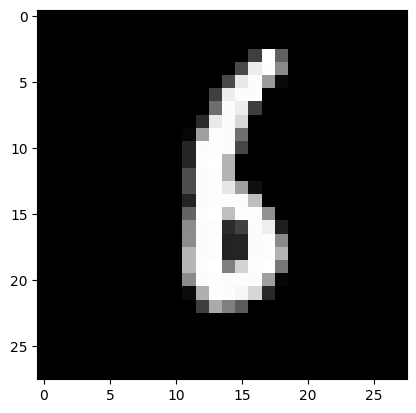

In [ ]:
example = trainX[1100]
print(trainY[1100])
print(np.max(example))
plt.imshow(example, cmap = 'gray')

In [ ]:
trainX = trainX/255
testX = testX/255

6


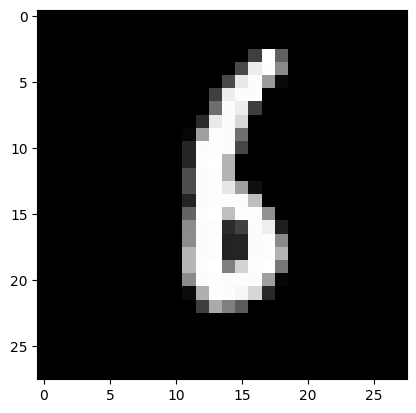

In [ ]:
example = trainX[1100]
print(trainY[1100])
plt.imshow(example, cmap = 'gray')

In [ ]:
np.max(example)

1.0

In [ ]:
print(trainX.shape)

(60000, 28, 28)


In [ ]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

In [ ]:
print(trainX.shape)

(60000, 28, 28, 1)


In [ ]:
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)

In [ ]:
trainY[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
img_shape = (28, 28, 1)

In [ ]:
model = keras.Sequential([
    keras.Input(shape = img_shape),
    tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       295040    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          73792     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 64)         

In [ ]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
hist = model.fit(trainX, trainY, batch_size=400,epochs = 15)

Epoch 1/15
150/150 [==============================] - 7s 34ms/step - loss: 0.4719 - accuracy: 0.8600 - recall: 0.7883 - precision: 0.9435
Epoch 2/15
150/150 [==============================] - 5s 34ms/step - loss: 0.1149 - accuracy: 0.9653 - recall: 0.9600 - precision: 0.9724
Epoch 3/15
150/150 [==============================] - 5s 35ms/step - loss: 0.0824 - accuracy: 0.9752 - recall: 0.9718 - precision: 0.9794
Epoch 4/15
150/150 [==============================] - 5s 34ms/step - loss: 0.0643 - accuracy: 0.9804 - recall: 0.9778 - precision: 0.9832
Epoch 5/15
150/150 [==============================] - 5s 35ms/step - loss: 0.0554 - accuracy: 0.9831 - recall: 0.9813 - precision: 0.9855
Epoch 6/15
150/150 [==============================] - 5s 34ms/step - loss: 0.0453 - accuracy: 0.9858 - recall: 0.9844 - precision: 0.9876
Epoch 7/15
150/150 [==============================] - 5s 35ms/step - loss: 0.0405 - accuracy: 0.9876 - recall: 0.9863 - precision: 0.9889
Epoch 8/15
150/150 [==============

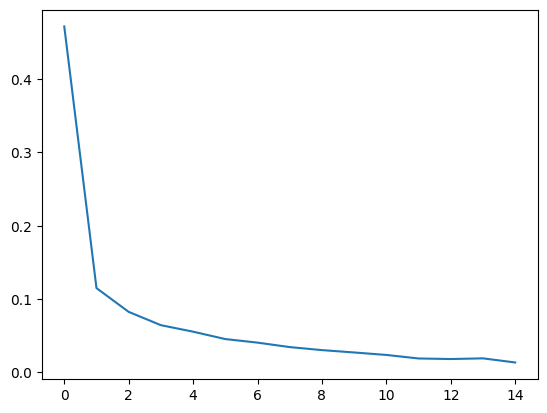

In [ ]:
plt.plot(hist.history['loss'])

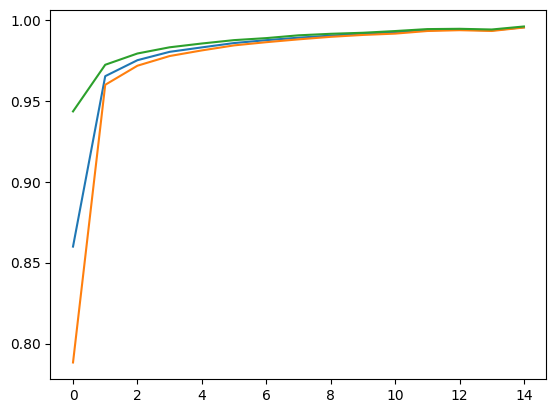

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['recall'])
plt.plot(hist.history['precision'])

In [ ]:
history=model.evaluate(testX,testY)

313/313 [==============================] - 2s 5ms/step - loss: 0.0554 - accuracy: 0.9861 - recall: 0.9856 - precision: 0.9869


In [ ]:
print(history)

[0.055383581668138504, 0.9861000180244446, 0.9855999946594238, 0.9868829250335693]


In [ ]:
predictions=model.predict(testX)

313/313 [==============================] - 1s 3ms/step


In [ ]:
predictions[31]

array([2.3050663e-06, 9.9811625e-01, 6.3541755e-08, 1.2301842e-07,
       1.5484164e-03, 3.6888163e-05, 1.8492884e-10, 1.7082284e-05,
       8.9120374e-05, 1.8975485e-04], dtype=float32)

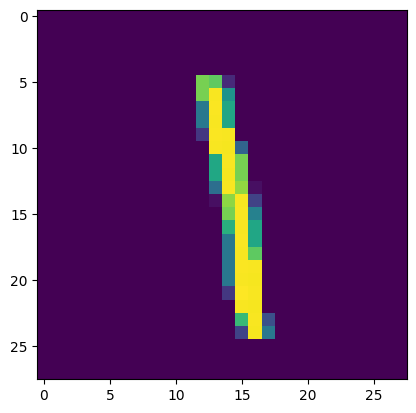

In [ ]:
plt.imshow(testX[31])

In [ ]:
testY[31]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model.save('mnist.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('mnist_cnn.keras')